<a href="https://colab.research.google.com/github/aiaaee/Stochastic-Policy-Iteration-in-Markov-Environments/blob/main/stochastic_policy_iteration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install git+https://github.com/mimoralea/gym-walk#egg=gym-walk

  Cloning https://github.com/mimoralea/gym-walk to /tmp/pip-install-6t8707br/gym-walk_7c54c12ecb494d99864ac05d9d67d085
  Running command git clone --filter=blob:none --quiet https://github.com/mimoralea/gym-walk /tmp/pip-install-6t8707br/gym-walk_7c54c12ecb494d99864ac05d9d67d085
  Resolved https://github.com/mimoralea/gym-walk to commit b915b94cf2ad16f8833a1ad92ea94e88159279f5
  Preparing metadata (setup.py) ... done
  Created wheel for gym-walk: filename=gym_walk-0.0.2-py3-none-any.whl size=5377 sha256=17fdf534eef6b91b0f8fccc332e15581a3914e400361e2687c9fdb53097eb3eb
  Stored in directory: /tmp/pip-ephem-wheel-cache-m8sogspg/wheels/bf/23/e5/a94be4a90dd18f7ce958c21f192276cb01ef0daaf2bc66583b
Successfully built gym-walk


In [22]:
import numpy as np
import warnings
# import  gym_walk
import seaborn as sns
import gymnasium as gym
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
LEFT, DOWN, RIGHT, UP = range(4)
env = gym.make('FrozenLake-v1')
P = env.env.env.env.P
print(P)

{0: {0: [(0.3333333333333333, 0, 0.0, False), (0.3333333333333333, 0, 0.0, False), (0.3333333333333333, 4, 0.0, False)], 1: [(0.3333333333333333, 0, 0.0, False), (0.3333333333333333, 4, 0.0, False), (0.3333333333333333, 1, 0.0, False)], 2: [(0.3333333333333333, 4, 0.0, False), (0.3333333333333333, 1, 0.0, False), (0.3333333333333333, 0, 0.0, False)], 3: [(0.3333333333333333, 1, 0.0, False), (0.3333333333333333, 0, 0.0, False), (0.3333333333333333, 0, 0.0, False)]}, 1: {0: [(0.3333333333333333, 1, 0.0, False), (0.3333333333333333, 0, 0.0, False), (0.3333333333333333, 5, 0.0, True)], 1: [(0.3333333333333333, 0, 0.0, False), (0.3333333333333333, 5, 0.0, True), (0.3333333333333333, 2, 0.0, False)], 2: [(0.3333333333333333, 5, 0.0, True), (0.3333333333333333, 2, 0.0, False), (0.3333333333333333, 1, 0.0, False)], 3: [(0.3333333333333333, 2, 0.0, False), (0.3333333333333333, 1, 0.0, False), (0.3333333333333333, 0, 0.0, False)]}, 2: {0: [(0.3333333333333333, 2, 0.0, False), (0.3333333333333333

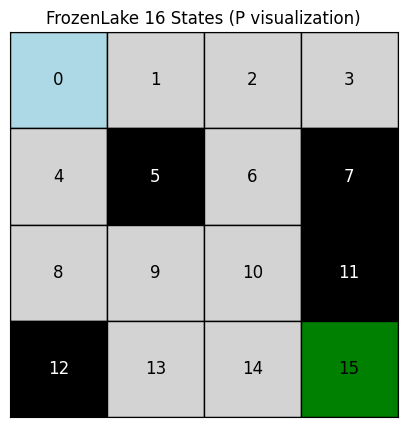

In [6]:

fig, ax = plt.subplots(figsize=(5,5))
color = 'lightgray'
state_num = 0
for i in range(4):
    for j in range(4):
      if i == 0 and j == 0 :
        color = 'lightblue'
        text_color='black'

      elif i == 3 and j == 3 :
        color = 'green'
        text_color='black'

      elif (i == 1 and j == 1) or (i == 1 and j == 3) or (i == 2 and j == 3 ) or (i == 3 and j == 0 ):
        text_color = 'white'
        color='black'
      else :
        color = 'lightgray'
        text_color='black'
      ax.add_patch(plt.Rectangle((j,i), 1 , 1 , edgecolor='black' , facecolor=color))
      ax.text(j+0.5, i+0.5 , str(state_num) , ha='center', va='center', fontsize=12 , color=text_color)
      state_num += 1

ax.set_xlim(0,4)
ax.set_ylim(0,4)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("FrozenLake 16 States (P visualization)")
plt.gca().invert_yaxis()
plt.show()


In [12]:
class Policy_Iteration():
  def __init__(self , env , pi , P , gamma=1.0 , theta=1e-10 , episodes=1000 , max_steps=100 , goal_state=16):
    self.env = env
    self.pi = pi
    self.p = P
    self.gamma= gamma
    self.theta = theta
    self.episodes = episodes
    self.max_steps = max_steps
    self.goal_state = 16

  def policy_evaluation(self , pi=None):
    if pi == None :
      pi = self.pi
    prev_V = np.zeros(len(self.p) , dtype=np.float64)
    while True :
      V = np.zeros(len(self.p) , dtype=np.float64)
      for s in range(len(self.p)):
        for prob , next_state , reward , done in self.p[s][self.pi(s)]:
          V[s] += prob * (reward + self.gamma * prev_V[next_state] * (not done))
      if np.max(np.abs(prev_V - V)) < self.theta:
        break
      prev_V = V.copy()
    return V

  def heatmap_policy_evaluation(self , policy_evaluation_value=None) :
    V = self.policy_evaluation()
    if policy_evaluation_value != None :
      V = policy_evaluation_value
    V_grid = V.reshape(4, 4)
    sns.heatmap(V_grid, annot=True, cmap='YlGnBu', fmt=".2f")
    plt.title("Policy Evaluation Heatmap")
    plt.show()

  def policy_improvement(self , V ):
    Q = np.zeros((len(self.p), len(self.p[0])), dtype=np.float64)
    for s in range(len(self.p)):
        for a in range(len(self.p[s])):
            for prob, next_state, reward, done in self.p[s][a]:
                Q[s][a] += prob * (reward + self.gamma * V[next_state] * (not done))
    new_pi = lambda s: {s:a for s, a in enumerate(np.argmax(Q, axis=1))}[s]
    return new_pi

  def plot_table_policy_improvement(self , policy_improvement_value=None):
    pi = self.pi
    if policy_improvement_value != None :
      pi = policy_improvement_value
    # Careful Policy Array :
    policy_arr = []
    for s in range(len(self.p)):
      policy_arr.append(pi(s))

    actions = ['←', '↓', '→', '↑']
    grid_policy = np.array([actions[a] for a in policy_arr]).reshape(4,4)

    # Plot Careful Policy :
    fig, ax = plt.subplots(figsize=(5,5))
    color = 'lightgray'
    state_num = 0
    for i in range(4):
        for j in range(4):
          if i == 0 and j == 0 :
            color = 'lightblue'
            text_color='black'

          elif i == 3 and j == 3 :
            color = 'green'
            text_color='green'

          elif (i == 1 and j == 1) or (i == 1 and j == 3) or (i == 2 and j == 3 ) or (i == 3 and j == 0 ):
            # text_color = 'black'
            color='black'
          else :
            color = 'lightgray'
            text_color='black'
          ax.add_patch(plt.Rectangle((j,i), 1 , 1 , edgecolor='black' , facecolor=color))
          ax.text(j+0.5, i+0.5 , grid_policy[i][j] , ha='center', va='center', fontsize=12 , color=text_color)
          # state_num += 1

    ax.set_xlim(0,4)
    ax.set_ylim(0,4)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title("FrozenLake 16 States (P visualization)")
    plt.gca().invert_yaxis()
    plt.show()

  def success_rate(self , policy=None):
    if policy == None :
      policy = self.pi
    success = 0
    for _ in range(self.episodes):
        state = env.reset()[0]
        for _ in range(self.max_steps):
            action =  policy(state)
            state, reward, done, truncated, info = env.step(action)
            if done:
                if reward == 1.0:
                    success += 1
                break
    percent = np.round(((success / self.episodes) * 100 ) , 2 )
    print(f'Reaches goal %{percent}')

## Careful Policy

In [13]:
careful_pi = lambda s: {
    0:LEFT, 1:UP, 2:UP, 3:UP,
    4:LEFT, 5:LEFT, 6:UP, 7:LEFT,
    8:UP, 9:DOWN, 10:LEFT, 11:LEFT,
    12:LEFT, 13:RIGHT, 14:RIGHT, 15:LEFT
}[s]

In [16]:
careful_policy_search = Policy_Iteration(env , careful_pi , P )

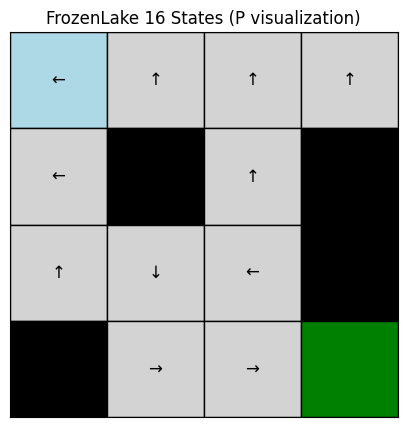

In [17]:
careful_policy_search.plot_table_policy_improvement()

In [18]:
careful_policy_evaluation = careful_policy_search.policy_evaluation()

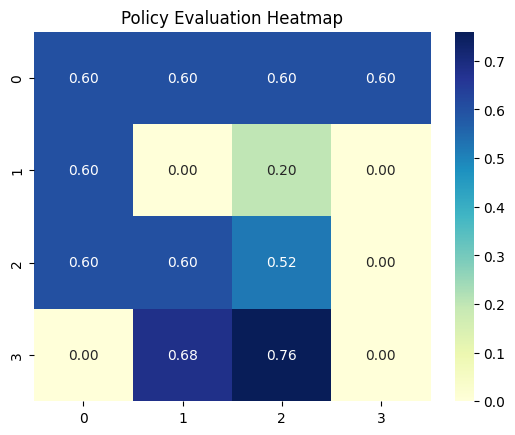

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [19]:
careful_policy_search.heatmap_policy_evaluation()

In [20]:
careful_policy_improvement = careful_policy_search.policy_improvement(careful_policy_evaluation)

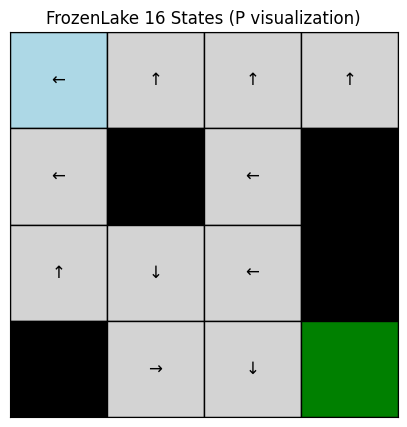

In [21]:
careful_policy_search.plot_table_policy_improvement(careful_policy_improvement)